[*********************100%***********************]  1 of 1 completed


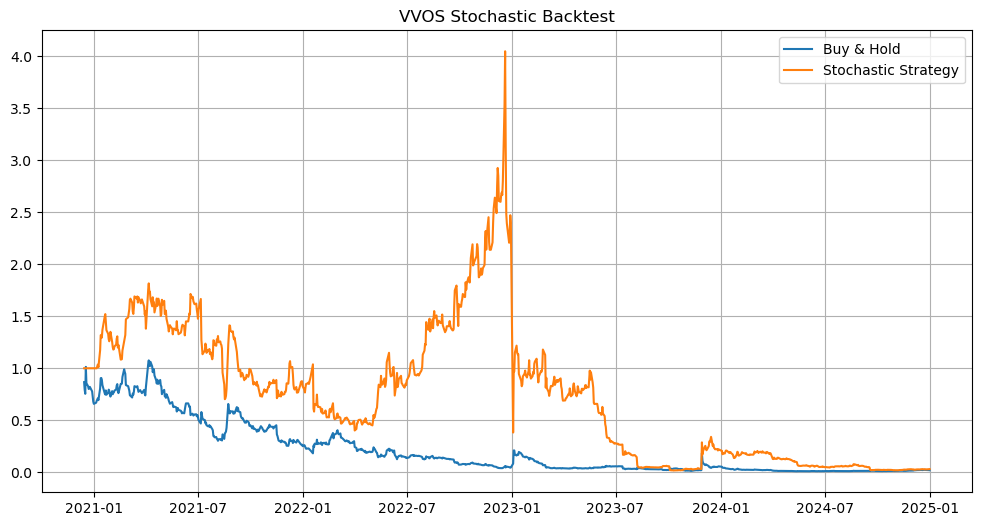

Backtest complete! Chart and data saved as:
   VVOS_Stochastic_backtest_chart.png
   VVOS_Stochastic_backtest.csv


In [11]:
#Necessary Packages
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from ta. momentum import RSIIndicator, StochasticOscillator
from ta.trend import MACD

#Data Inputed
ticker = 'VVOS' #We will be changing this for each stock
indicator = 'Stochastic' #likewise, we will also be changing this for each indicator
start_date = '2015-01-01'
end_date = '2025-01-01'

#Gets the data
data = yf.download(ticker, start=start_date, end=end_date)

#Functions for each indicator (check references for more details)
if indicator == 'RSI': 
    rsi = RSIIndicator(close=data['Close'].squeeze())
    data['rsi'] = rsi.rsi()
    data['signal'] = 0
    data.loc[data['rsi'] < 30, 'signal'] = 1
    data.loc[data['rsi'] > 70, 'signal'] = -1

elif indicator == 'MACD':
    macd = MACD(close=data['Close'].squeeze())
    data['macd'] = macd.macd()
    data['macd_signal'] = macd.macd_signal()
    data['signal'] = 0
    data.loc[data['macd'] > data['macd_signal'], 'signal'] = 1
    data.loc[data['macd'] < data['macd_signal'], 'signal'] = -1

elif indicator == 'Stochastic':
    stoch = StochasticOscillator(
        high=data['High'].squeeze(),
        low=data['Low'].squeeze(),
        close=data['Close'].squeeze()
    )
    data['k'] = stoch.stoch()
    data['d'] = stoch.stoch_signal()
    data['signal'] = 0
    data.loc[data['k'] > data['d'], 'signal'] = 1
    data.loc[data['k'] < data['d'], 'signal'] = -1

# For the backtesting: data['signal'] represents the trading decision for the current day
# While data['position'] = signal.shift(1) executes the order on the next day
data['position'] = data['signal'].shift(1).fillna(0)
data['returns'] = data['Close'].pct_change()
data['strategy_returns'] = data['position'] * data['returns']
data['cumulative_returns'] = (1 + data['returns']).cumprod()
data['cumulative_strategy'] = (1 + data['strategy_returns']).cumprod()


#For plotting the results/Equity Curves
plt.figure(figsize=(12,6))
plt.plot(data['cumulative_returns'], label='Buy & Hold')
plt.plot(data['cumulative_strategy'], label=f'{indicator} Strategy')
plt.title(f'{ticker} {indicator} Backtest')
plt.legend()
plt.grid()
plt.savefig(f"{ticker}_{indicator}_backtest_chart.png", dpi = 300, bbox_inches='tight')
plt.show()

#For exporting the results (charts & backtesting data)
data.to_csv(f'{ticker}_{indicator}_backtest.csv')
print(f"Backtest complete! Chart and data saved as:")
print(f"   {ticker}_{indicator}_backtest_chart.png")
print(f"   {ticker}_{indicator}_backtest.csv")